Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"
Warning message:
"package 'urca' was built under R version 3.6.3"



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 3.0756 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


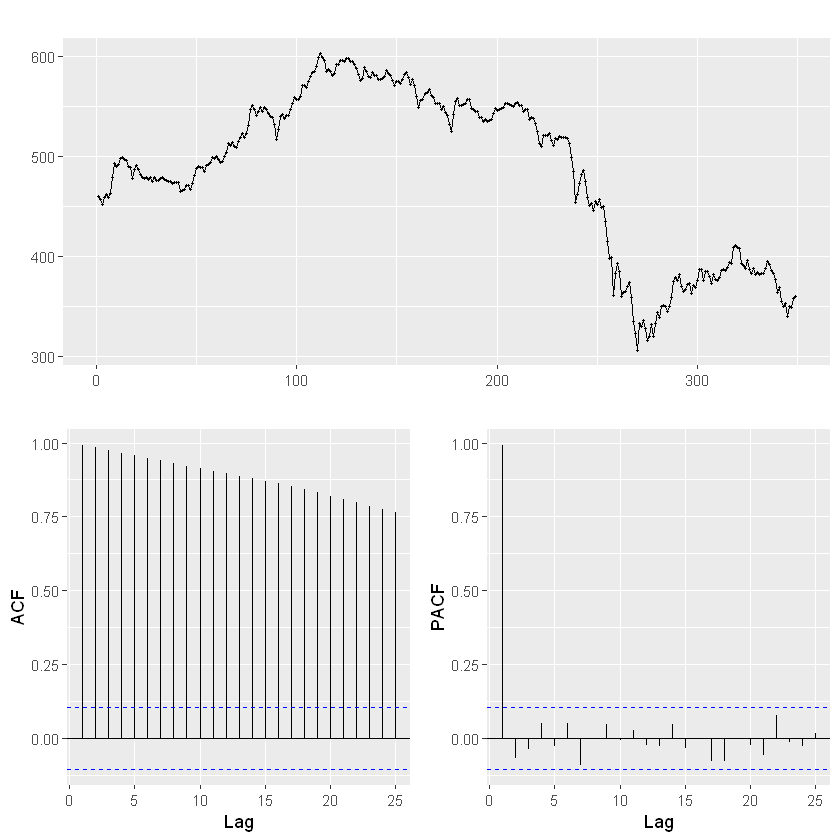

In [1]:
library(forecast)
library(ggplot2)
library(fpp2)
library(urca)

# 데이터 나누기 Train data : 시작 350개,  Test data : 마지막 
train <- window(ibmclose, start=1, end=349)
test <- window(ibmclose, start=350)
h <- length(ibmclose)-length(train)

# ACF와 PACF를 통해 모형식별 및 학습데이터 그려 눈으로 먼저 식별
ggtsdisplay(train)

# KPSS 통계검정 활용
summary(ur.kpss(train))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.5265 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


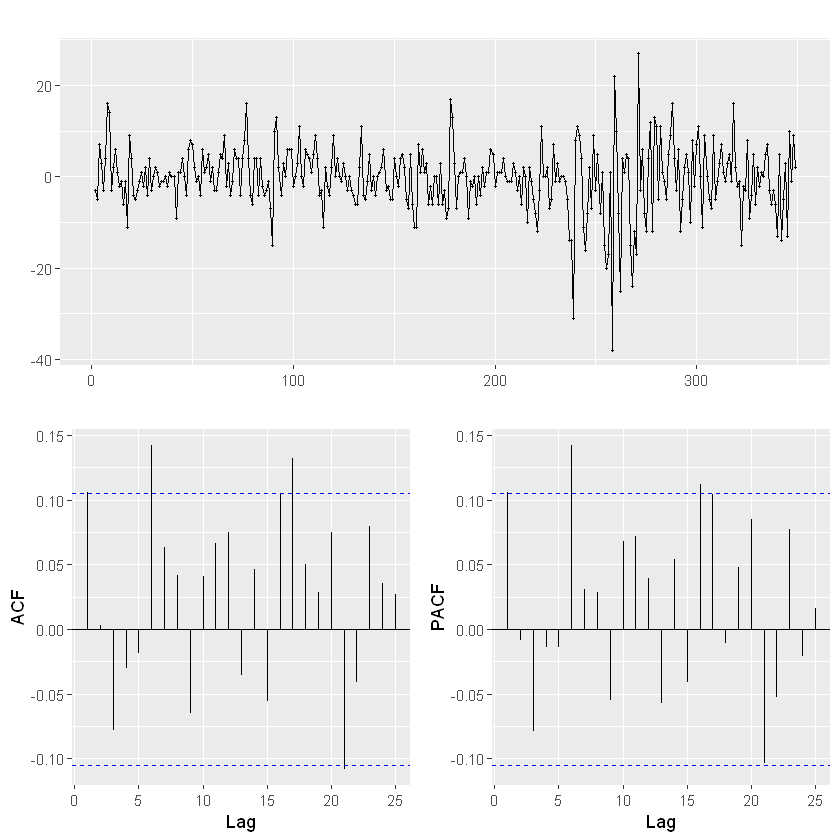

In [2]:
train_d <- diff(train)
ggtsdisplay(train_d)
summary(ur.kpss(train_d))

In [3]:
# estimation
arima_111 <- Arima(train, order=c(1,1,1), include.mean=FALSE)
arima_111

arima_110 <- Arima(train, order=c(1,1,0), include.mean=FALSE)
arima_110

arima_210 <- Arima(train, order=c(2,1,0), include.mean=FALSE)
arima_210

arima_211 <- Arima(train, order=c(2,1,1), include.mean=FALSE)
arima_211

Series: train 
ARIMA(1,1,1) 

Coefficients:
         ar1     ma1
      0.0813  0.0260
s.e.  0.3233  0.3216

sigma^2 estimated as 52.06:  log likelihood=-1180.51
AIC=2367.02   AICc=2367.09   BIC=2378.58

Series: train 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.1068
s.e.  0.0532

sigma^2 estimated as 51.91:  log likelihood=-1180.51
AIC=2365.03   AICc=2365.06   BIC=2372.73

Series: train 
ARIMA(2,1,0) 

Coefficients:
         ar1      ar2
      0.1075  -0.0066
s.e.  0.0535   0.0536

sigma^2 estimated as 52.06:  log likelihood=-1180.51
AIC=2367.01   AICc=2367.08   BIC=2378.57

Series: train 
ARIMA(2,1,1) 

Coefficients:
          ar1     ar2     ma1
      -0.7907  0.1395  0.9021
s.e.   0.0805  0.0534  0.0625

sigma^2 estimated as 51.68:  log likelihood=-1178.76
AIC=2365.53   AICc=2365.64   BIC=2380.93


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 13.768, df = 8, p-value = 0.08802

Model df: 2.   Total lags used: 10




	Box-Ljung test

data:  arima_111$residuals
X-squared = 13.768, df = 10, p-value = 0.1838


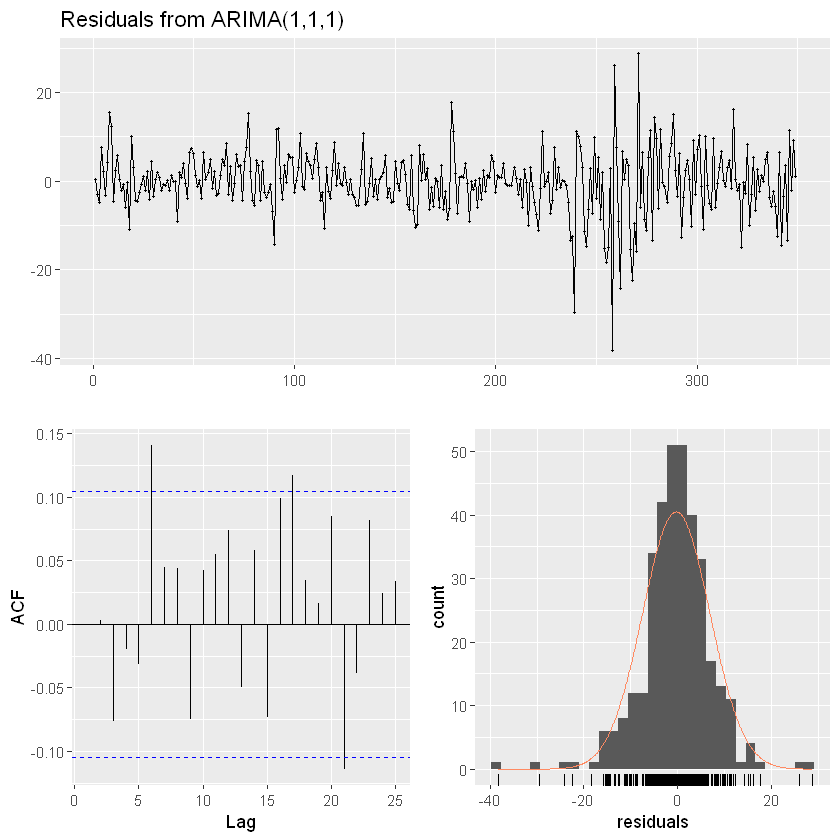

In [4]:
# 적합성 진단 way1
checkresiduals(arima_111)

# 적합성 진단 way2
Box.test(arima_111$residuals, lag=10, type="Ljung-Box")


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 13.774, df = 9, p-value = 0.1306

Model df: 1.   Total lags used: 10




	Box-Ljung test

data:  arima_110$residuals
X-squared = 13.774, df = 10, p-value = 0.1836


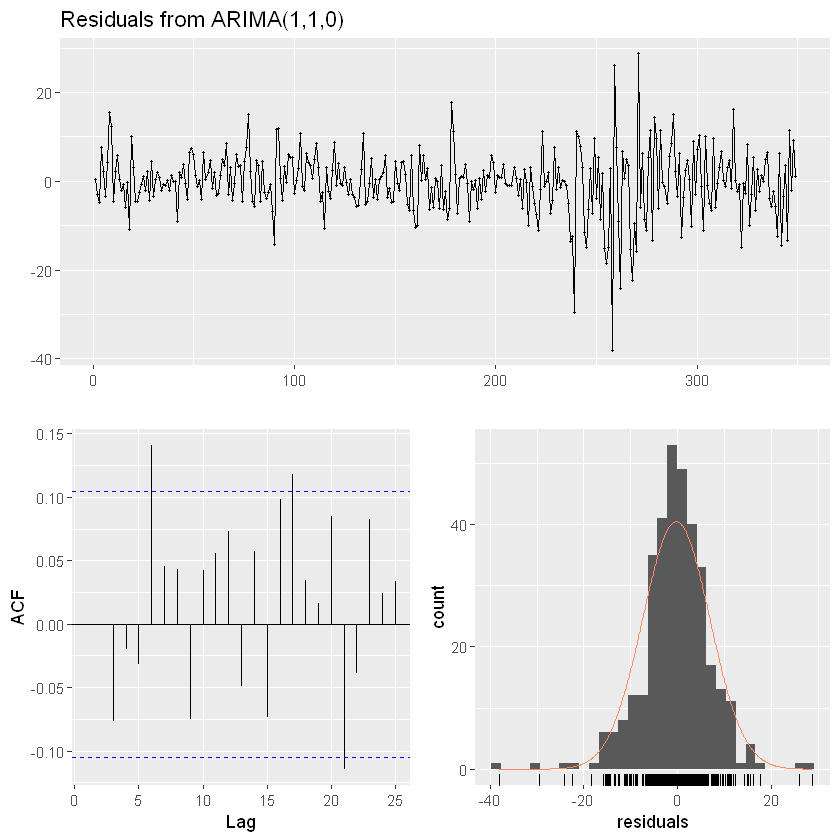

In [5]:
# 적합성 진단 way1
checkresiduals(arima_110)

# 적합성 진단 way2
Box.test(arima_110$residuals, lag=10, type="Ljung-Box")


	Ljung-Box test

data:  Residuals from ARIMA(2,1,0)
Q* = 13.755, df = 8, p-value = 0.08838

Model df: 2.   Total lags used: 10




	Box-Ljung test

data:  arima_210$residuals
X-squared = 13.755, df = 10, p-value = 0.1845


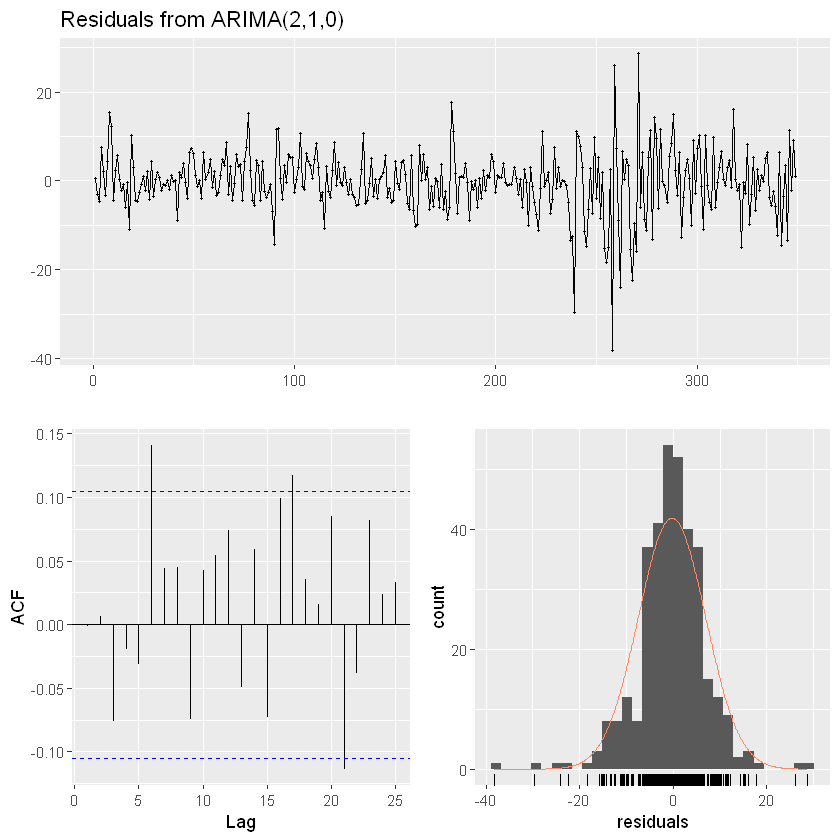

In [6]:
# 적합성 진단 way1
checkresiduals(arima_210)

# 적합성 진단 way2
Box.test(arima_210$residuals, lag=10, type="Ljung-Box")


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)
Q* = 9.9692, df = 7, p-value = 0.1903

Model df: 3.   Total lags used: 10




	Box-Ljung test

data:  arima_211$residuals
X-squared = 9.9692, df = 10, p-value = 0.4432


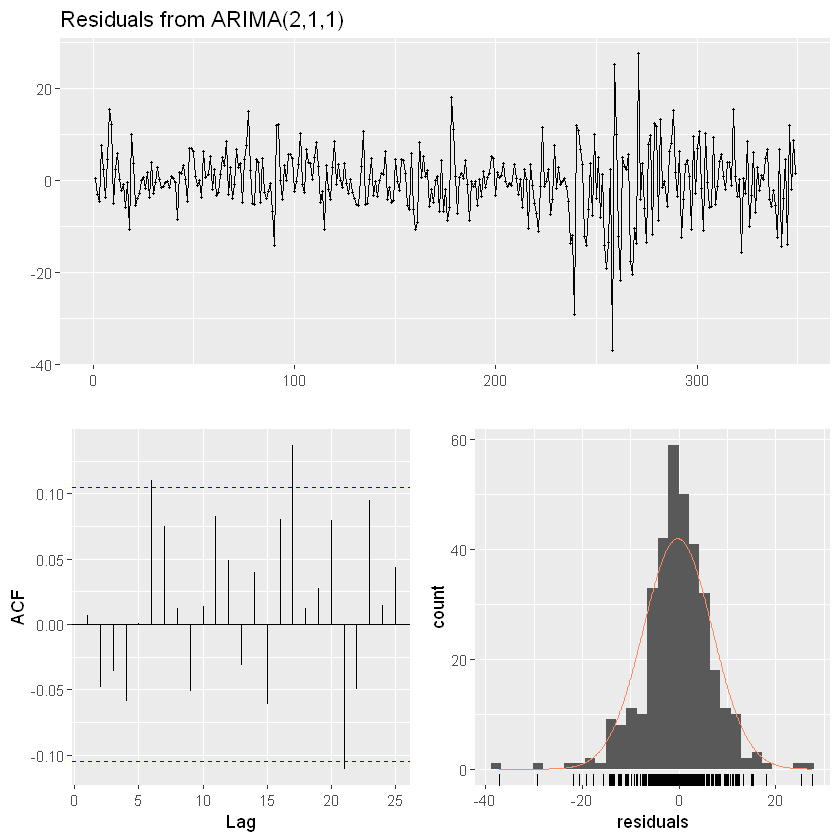

In [7]:
# 적합성 진단 way1
checkresiduals(arima_211)

# 적합성 진단 way2
Box.test(arima_211$residuals, lag=10, type="Ljung-Box")

In [8]:
# 예측
arima_111_fore <- forecast(arima_111, h=20)
arima_110_fore <- forecast(arima_110, h=20)
arima_210_fore <- forecast(arima_110, h=20)
arima_211_fore <- forecast(arima_110, h=20)

# 예측 성과
accuracy(arima_111_fore, test)
accuracy(arima_110_fore, test)
accuracy(arima_210_fore, test)
accuracy(arima_211_fore, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.2546743,7.184244,5.122247,-0.07599528,1.157833,0.9980639,-0.001114245,NA
Test set,-9.2552908,13.803088,10.593566,-2.72602144,3.091465,2.0641439,0.699705172,1.852785


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.2539571,7.184309,5.122808,-0.07577743,1.157948,0.9981731,-0.0003851708,NA
Test set,-9.2876680,13.825186,10.616212,-2.73525914,3.098034,2.0685563,0.6997170096,1.855733


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.2539571,7.184309,5.122808,-0.07577743,1.157948,0.9981731,-0.0003851708,NA
Test set,-9.2876680,13.825186,10.616212,-2.73525914,3.098034,2.0685563,0.6997170096,1.855733


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.2539571,7.184309,5.122808,-0.07577743,1.157948,0.9981731,-0.0003851708,NA
Test set,-9.2876680,13.825186,10.616212,-2.73525914,3.098034,2.0685563,0.6997170096,1.855733
